<a href="https://colab.research.google.com/github/AgampreetKaur/stockpriceprediction/blob/main/stockprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

Writing my_keras_model.py


In [17]:
start ='2012-01-01'
end= '2022-12-21'
stock = 'GOOG'
data= yf.download(stock,start,end)


[*********************100%***********************]  1 of 1 completed


In [18]:
data.reset_index(inplace=True)
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03 00:00:00+00:00,16.532528,16.573130,16.641375,16.248346,16.262545,147611217
1,2012-01-04 00:00:00+00:00,16.603836,16.644611,16.693678,16.453827,16.563665,114989399
2,2012-01-05 00:00:00+00:00,16.373516,16.413727,16.537264,16.344486,16.491436,131808205
3,2012-01-06 00:00:00+00:00,16.150156,16.189817,16.438385,16.184088,16.417213,108119746
4,2012-01-09 00:00:00+00:00,15.465409,15.503389,16.114599,15.472754,16.102144,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14 00:00:00+00:00,95.076508,95.309998,97.220001,93.940002,95.540001,26452900
2757,2022-12-15 00:00:00+00:00,90.976570,91.199997,94.029999,90.430000,93.540001,28298800
2758,2022-12-16 00:00:00+00:00,90.637413,90.860001,91.750000,90.010002,91.199997,48485500


In [19]:
ma_100_days= data.Close.rolling(100).mean()


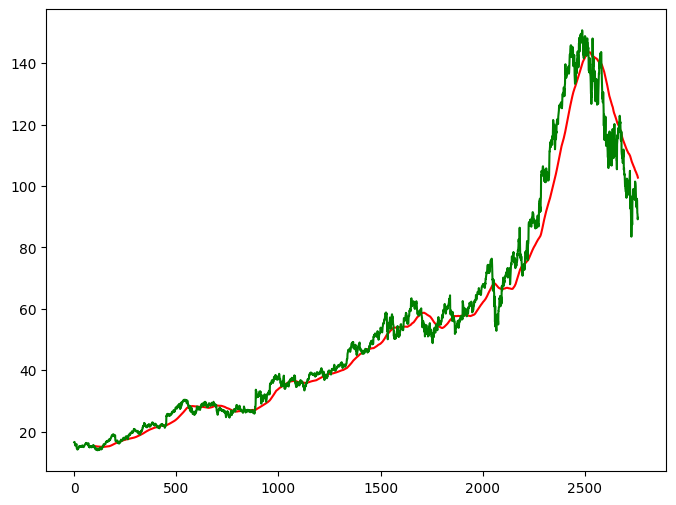

In [20]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [22]:
ma_200_days=data.Close.rolling(200).mean()

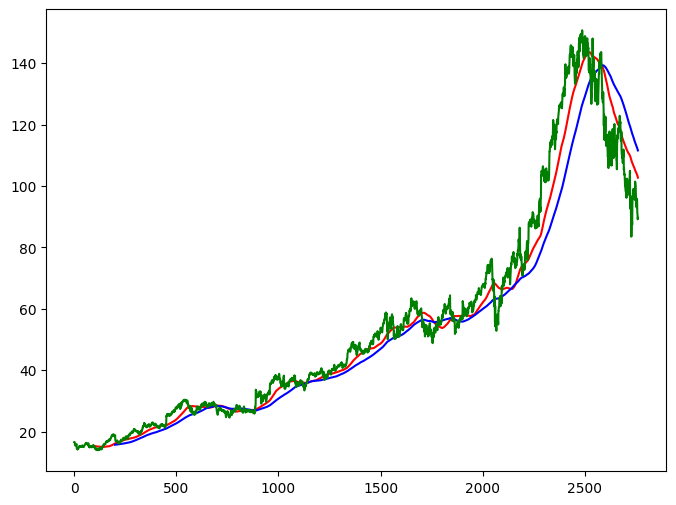

In [23]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [24]:
data.dropna(inplace=True)

In [30]:
data_train= pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test= pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [32]:
data_train.shape[0], data_test.shape[0]

(2208, 553)

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [34]:
data_train_scale= scaler.fit_transform(data_train)

In [36]:
x=[]
y=[]
for  i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [39]:
x,y= np.array(x),np.array(y)

In [37]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [40]:
model= Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x,y, epochs=50, batch_size=32,verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 29s 330ms/step - loss: 0.0725
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 43s 359ms/step - loss: 0.0073
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 39s 329ms/step - loss: 0.0053
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 332ms/step - loss: 0.0060
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 337ms/step - loss: 0.0046
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 305ms/step - loss: 0.0047
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 338ms/step - loss: 0.0040
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 342ms/step - loss: 0.0044
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 342ms/step - loss: 0.0038
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 343ms/step - loss: 0.0042
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 43s 376ms/step - loss: 0.0039
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 38s 330ms/step - loss: 0.0044
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 325ms/step - loss: 0.0034
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 334ms/step - loss: 0.0033
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 

In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [44]:
pas_100_days = data_train.tail(100)


In [45]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [47]:
data_test_scale= scaler.fit_transform(data_test)

In [49]:
 x=[]
 y=[]
 for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y= np.array(x),np.array(y)

In [51]:
y_predict=model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step


In [56]:
scale=1/scaler.scale_

In [57]:
y_predict=y_predict*scale

In [58]:
y=y*scale

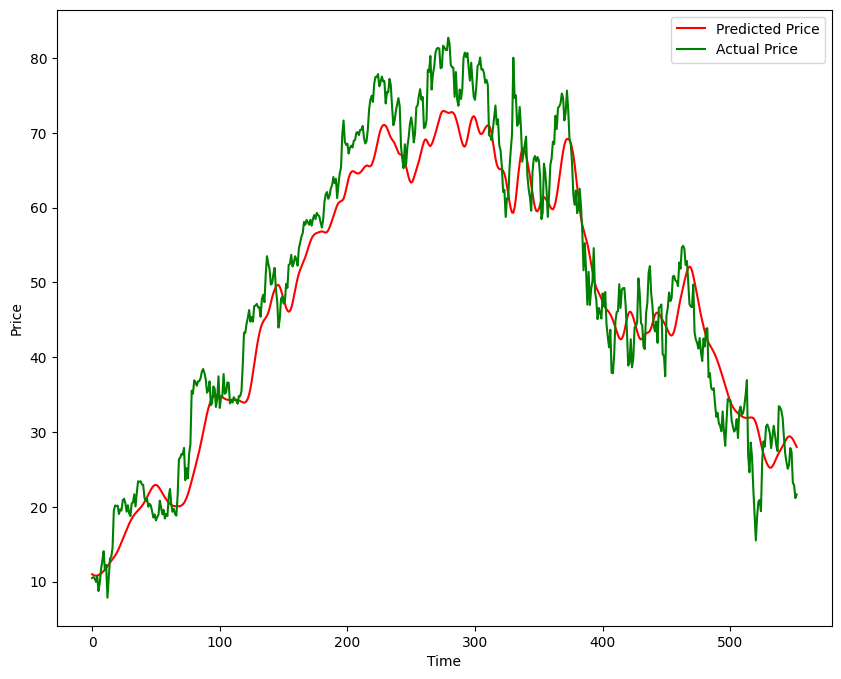

In [60]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y,'g',label='Actual Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [66]:
model.save('stock_price_prediction.h5')